Mean period: 32.53 hours
Median period: 22.64 hours
Standard deviation of periods: 22.15 hours
Minimum period: 2.04 hours
Maximum period: 1200.00 hours


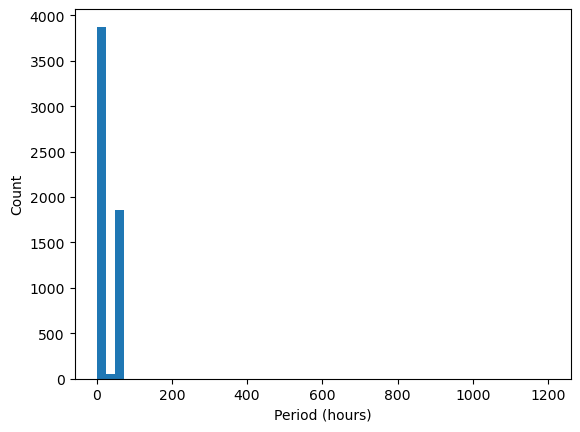

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

# Load Converted Star Data csv
star_data = pd.read_csv('/Users/kobibrown/Desktop/Distance_Ladder_Project/Converted_Star_Data.csv')

# variables
variable_stars = star_data[star_data['Variable?'] == 1]['Name']
periods = []
period_uncertainties = []

# Calculate the period and uncertainty for each variable star
for star_id in variable_stars:
    var_data = pd.read_csv(f'/Users/kobibrown/Desktop/Distance_Ladder_Project/Variable_Star_Data/{star_id}.csv')
    time = var_data['Time']
    flux = var_data['NormalisedFlux']
    flux_std = np.std(flux)
    mean_flux = np.mean(flux)
    N = len(time)

    # Compute the Lomb-Scargle periodogram
    frequency, power = LombScargle(time, flux).autopower(method='fast', nyquist_factor=1)

    # Check if a peak is detected
    if len(power) == 0:
        continue

    # Find the frequency corresponding to the maximum power
    max_power_idx = np.argmax(power)
    best_frequency = frequency[max_power_idx]

    # Convert frequency to period
    period = 1 / best_frequency
    periods.append(period)

    # Calculate the uncertainty in period using the FWHM of the power peak
    half_max_power = power[max_power_idx] / 2
    if max_power_idx == 0 or len(power) == 0:
        delta_P = np.nan
    else:
        left_idx = np.argmin(np.abs(power[:max_power_idx] - half_max_power))
        right_idx = np.argmin(np.abs(power[max_power_idx:] - half_max_power)) + max_power_idx
        fwhm = frequency[right_idx] - frequency[left_idx]
        delta_f = (1 / (2 * np.pi * best_frequency**2)) * (np.sqrt(2 / N) * flux_std)
        min_delta_f = 1e-10
        if delta_f < min_delta_f:
            delta_f = min_delta_f
        delta_t = 0.3
        delta_P_squared = (delta_f**2) + ((1/(2*np.pi*(best_frequency**2)))**2)*((np.sum((flux-mean_flux)*np.cos(2*np.pi*best_frequency*time)))/(np.sum(np.cos(2*np.pi*best_frequency*time)**2))**2)*(delta_t**2)
        delta_P = np.sqrt(delta_P_squared) if delta_P_squared >= 0 else np.nan
    period_uncertainties.append(delta_P)
    
# Convert periods and uncertainties to numpy arrays
periods = np.array(periods)
period_uncertainties = np.array(period_uncertainties)

# Calculate summary statistics for the periods
mean_period = np.mean(periods)
median_period = np.median(periods)
std_period = np.std(periods)
min_period = np.min(periods)
max_period = np.max(periods)

# Print summary statistics for the periods
print(f"Mean period: {mean_period:.2f} hours")
print(f"Median period: {median_period:.2f} hours")
print(f"Standard deviation of periods: {std_period:.2f} hours")
print(f"Minimum period: {min_period:.2f} hours")
print(f"Maximum period: {max_period:.2f} hours")

# Plot a frequency distribution of the periods
plt.hist(periods, bins=50)
plt.xlabel('Period (hours)')
plt.ylabel('Count')
plt.show()


Mean period: 32.73 hours
Median period: 22.64 hours
Standard deviation of periods: 15.70 hours
Minimum period: 18.46 hours
Maximum period: 63.16 hours


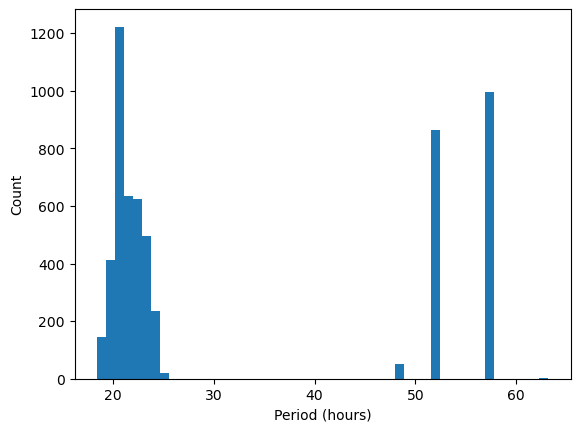

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

# Load Converted Star Data csv
star_data = pd.read_csv('/Users/kobibrown/Desktop/Distance_Ladder_Project/Converted_Star_Data.csv')

# variables
variable_stars = star_data[star_data['Variable?'] == 1]['Name']
periods = []
period_uncertainties = []

# Calculate the period and uncertainty for each variable star
for star_id in variable_stars:
    var_data = pd.read_csv(f'/Users/kobibrown/Desktop/Distance_Ladder_Project/Variable_Star_Data/{star_id}.csv')
    time = var_data['Time']
    flux = var_data['NormalisedFlux']
    flux_std = np.std(flux)
    mean_flux = np.mean(flux)
    N = len(time)

    # Compute the Lomb-Scargle periodogram
    frequency, power = LombScargle(time, flux).autopower(method='fast', nyquist_factor=1)

    # Check if a peak is detected
    if len(power) == 0:
        continue

    # Find the frequency corresponding to the maximum power
    max_power_idx = np.argmax(power)
    best_frequency = frequency[max_power_idx]

    # Convert frequency to period
    period = 1 / best_frequency

    # Calculate the false alarm probability (FAP) of the period
    fap = LombScargle(time, flux).false_alarm_probability(power[max_power_idx], method='baluev')

    # Only keep periods with FAP < 0.01
    if fap >= 0.01:
        continue

    periods.append(period)

    # Calculate the uncertainty in period using the FWHM of the power peak
    half_max_power = power[max_power_idx] / 2
    if max_power_idx == 0 or len(power) == 0:
        delta_P = np.nan
    else:
        left_idx = np.argmin(np.abs(power[:max_power_idx] - half_max_power))
        right_idx = np.argmin(np.abs(power[max_power_idx:] - half_max_power)) + max_power_idx
        fwhm = frequency[right_idx] - frequency[left_idx]
        delta_f = (1 / (2 * np.pi * best_frequency**2)) * (np.sqrt(2 / N) * flux_std)
        min_delta_f = 1e-10
        if delta_f < min_delta_f:
            delta_f = min_delta_f
        delta_t = 0.3
        delta_P_squared = (delta_f**2) + ((1/(2*np.pi*(best_frequency**2)))**2)*((np.sum((flux-mean_flux)*np.cos(2*np.pi*best_frequency*time)))/(np.sum(np.cos(2*np.pi*best_frequency*time)**2))**2)*(delta_t**2)
        delta_P = np.sqrt(delta_P_squared) if delta_P_squared >= 0 else np.nan
    period_uncertainties.append(delta_P)
    
# Convert periods and uncertainties to numpy arrays
periods = np.array(periods)
period_uncertainties = np.array(period_uncertainties)

# Calculate summary statistics for the periods
mean_period = np.mean(periods)
median_period = np.median(periods)
std_period = np.std(periods)
min_period = np.min(periods)
max_period = np.max(periods)

# Print summary statistics for the periods
print(f"Mean period: {mean_period:.2f} hours")
print(f"Median period: {median_period:.2f} hours")
print(f"Standard deviation of periods: {std_period:.2f} hours")
print(f"Minimum period: {min_period:.2f} hours")
print(f"Maximum period: {max_period:.2f} hours")

# Plot a frequency distribution of the periods
plt.hist(periods, bins=50)
plt.xlabel('Period (hours)')
plt.ylabel('Count')
plt.show()



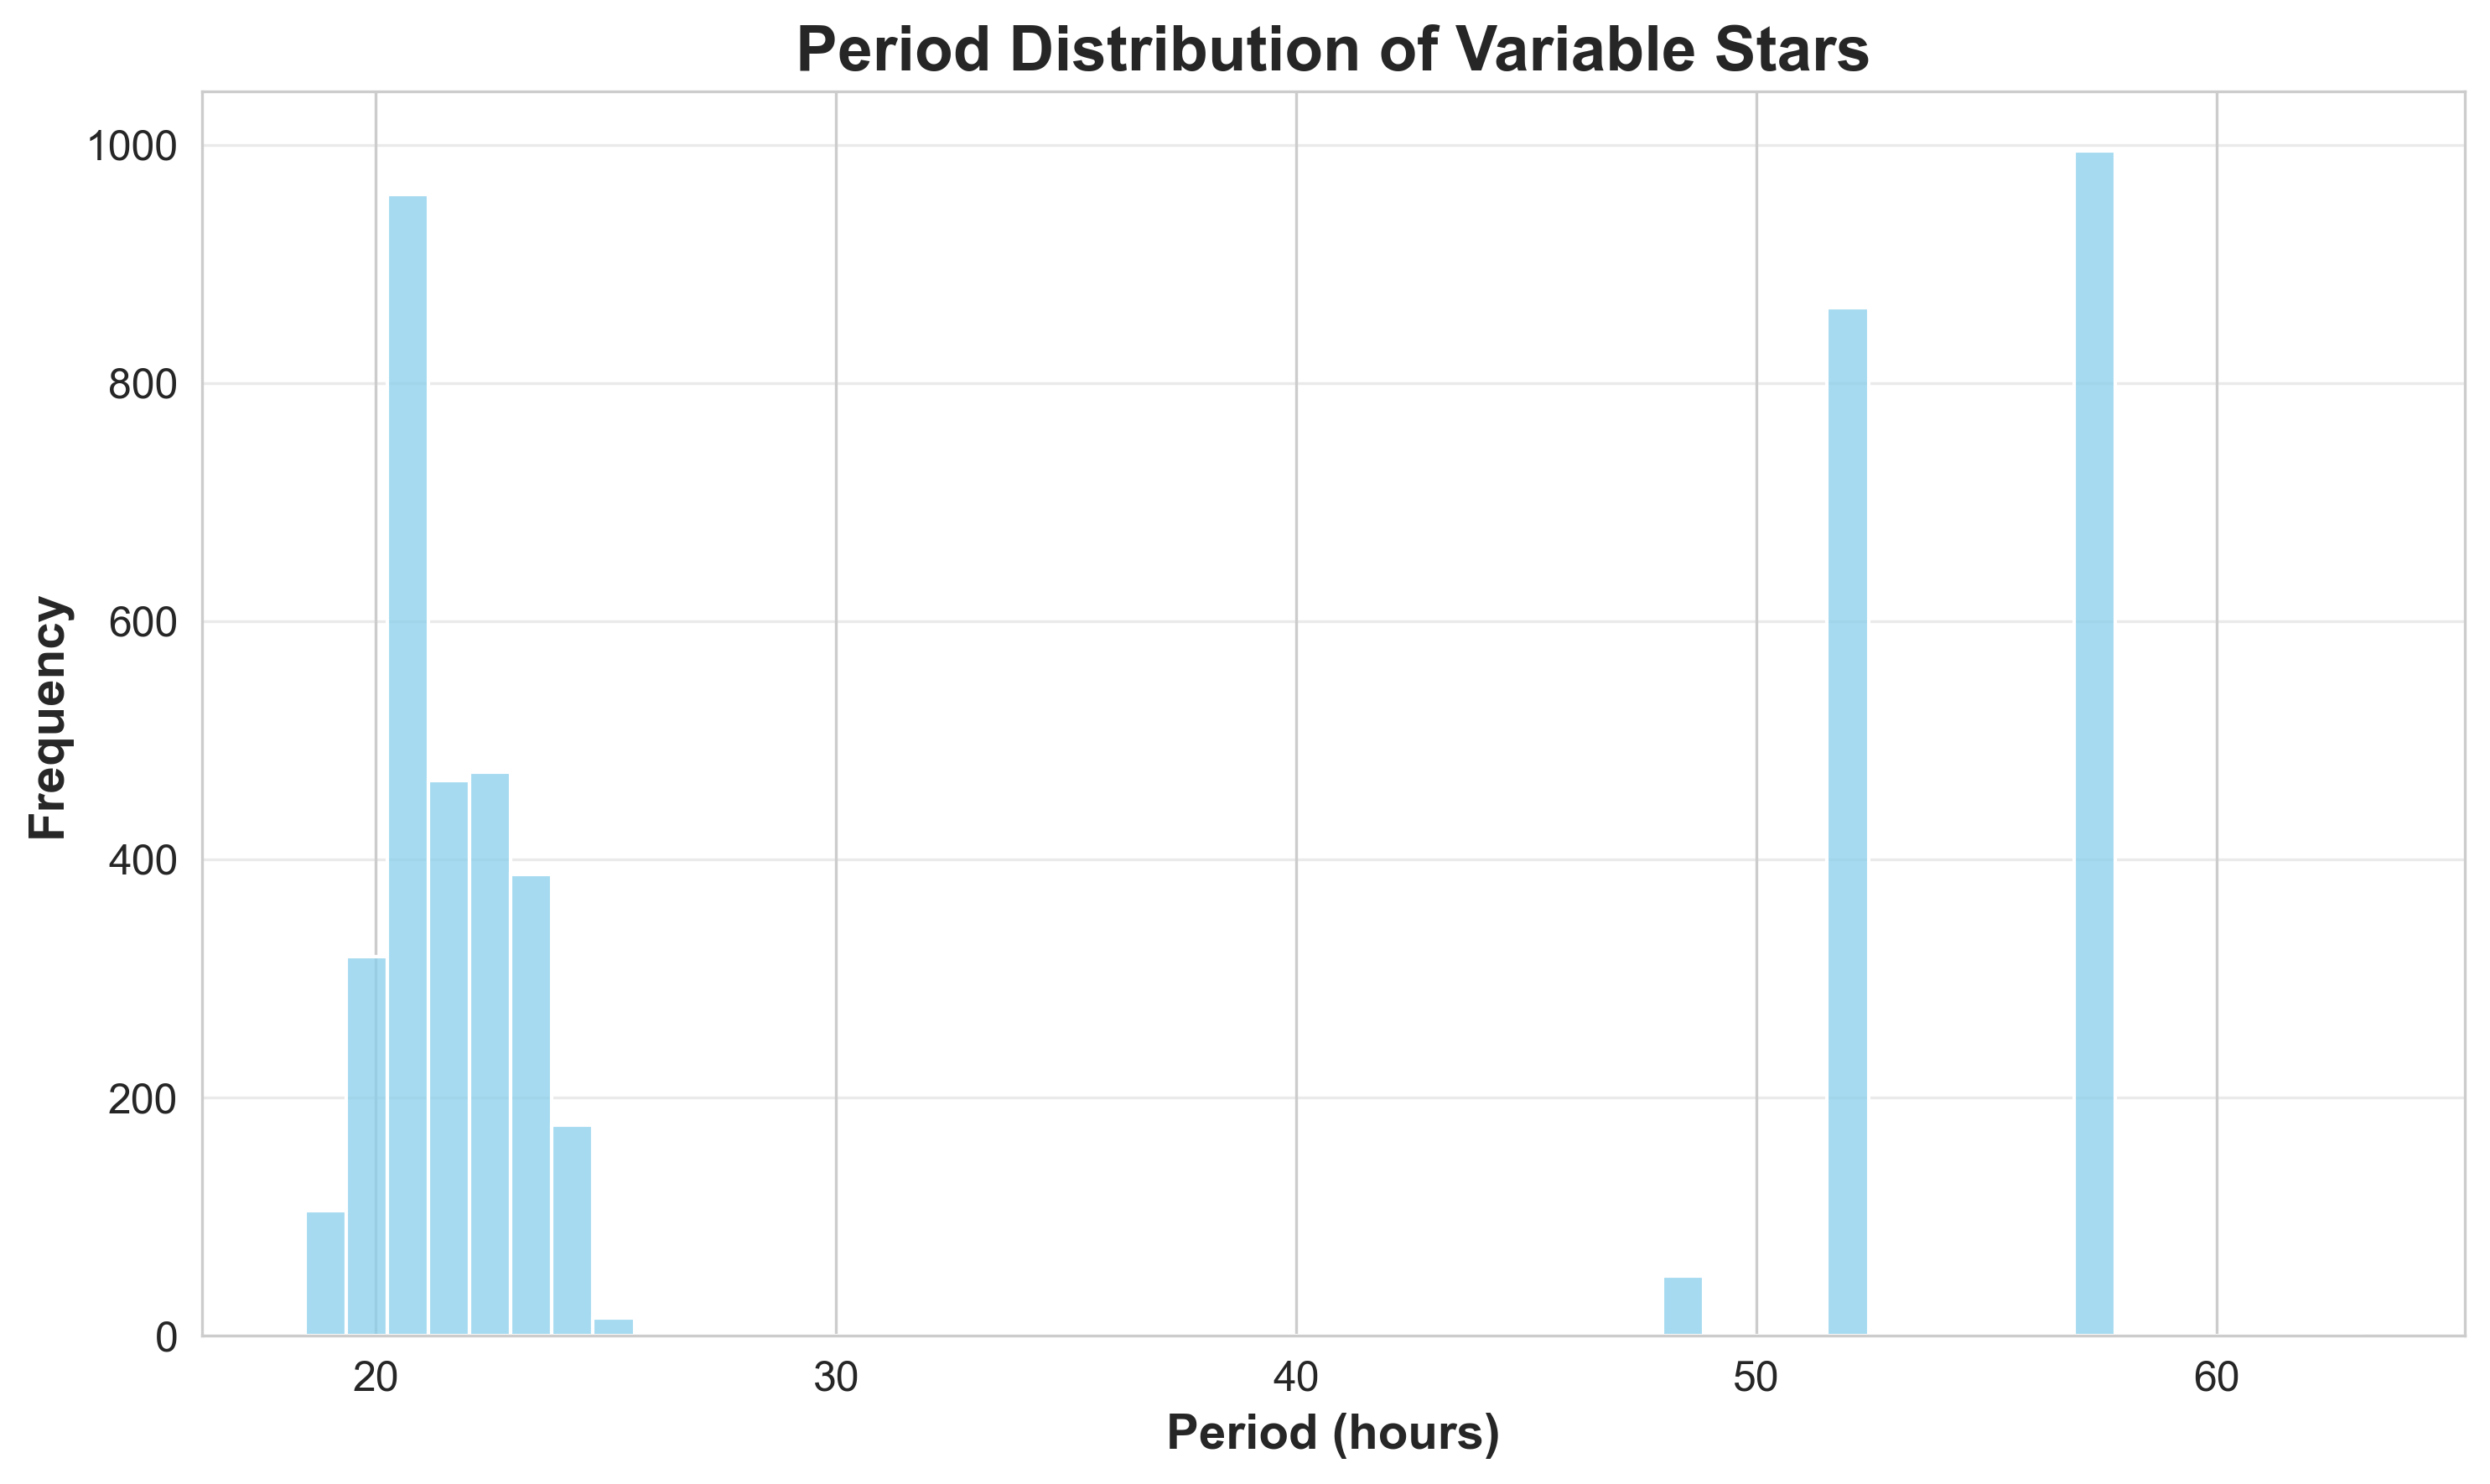

In [16]:
import seaborn as sns

# Create a histogram of the periods
plt.figure(figsize=(10, 6), dpi=300)
sns.set_style("whitegrid")

# Set a FAP threshold of 0.1%
fap_threshold = LombScargle(time, flux).false_alarm_probability(power.max(), method='baluev')
periods_filtered = periods[period_uncertainties/periods <= 0.1/fap_threshold]

# Plot the histogram with 50 bins
ax = sns.histplot(x=periods_filtered, bins=50, color="skyblue", kde=False)

# Set title and axis labels
ax.set_title("Period Distribution of Variable Stars", fontsize=18, fontweight="bold")
ax.set_xlabel("Period (hours)", fontsize=14, fontweight="bold")
ax.set_ylabel("Frequency", fontsize=14, fontweight="bold")

# Set tick parameters
ax.tick_params(axis="both", which="major", labelsize=12)

# Add grid lines and legend
ax.grid(axis="y", alpha=0.4)

# Save and show the plot
plt.tight_layout()
plt.savefig("variable_star_periods.png")
plt.show()